In [1]:
from NNScratchLib.models.MultiClassModels import NeuralNetwork
from NNScratchLib.models.Layers import SequentialLayer

from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import measure_functions
from NNScratchLib.functions import optimizers

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

Definiremos una red neuronal de 4 entradas, con una capa oculta de 4 neuronas, y una capa de salida de 3 neuronas. La función de activación para la capa oculta será la sigmoide y para la de salida la función softmax. Como el backpropagation ya tiene en cuenta la función de activación en la última capa, no es necesario definirla su derivada.

### Definición de la red

In [2]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 5, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(5, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.mse_derivate))

### Dataset de Iris

Cargamos el dataset IRIS, y dividimos el conjunto de datos en en train y test.

In [15]:
iris = pd.read_csv('NNScratchLib/datasets/iris')
iris = shuffle(iris)

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

A continuación, entrenamos el modelo con el conjunto de entrenamiento, y mostramos la evolución del error en cada iteración. Utilizaremos el optimizador del descenso del gradiente clásico, con una tasa de aprendizaje de 0.01

In [17]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=300, learning_rate=0.01)

accuracy before training:  0.3
epoch   0 - Loss 1.15304, Accuracy 0.29167


epoch  10 - Loss 1.08964, Accuracy 0.29167
epoch  20 - Loss 1.07147, Accuracy 0.29167
epoch  30 - Loss 1.05600, Accuracy 0.29167
epoch  40 - Loss 1.02126, Accuracy 0.33333
epoch  50 - Loss 0.95565, Accuracy 0.70833
epoch  60 - Loss 0.86985, Accuracy 0.75000
epoch  70 - Loss 0.75466, Accuracy 0.75000
epoch  80 - Loss 0.62717, Accuracy 0.75000
epoch  90 - Loss 0.51321, Accuracy 0.70833
epoch 100 - Loss 0.42352, Accuracy 0.75000
epoch 110 - Loss 0.35612, Accuracy 0.79167
epoch 120 - Loss 0.30565, Accuracy 0.79167
epoch 130 - Loss 0.26740, Accuracy 0.87500
epoch 140 - Loss 0.23794, Accuracy 0.91667
epoch 150 - Loss 0.21486, Accuracy 0.95833
epoch 160 - Loss 0.19646, Accuracy 0.95833
epoch 170 - Loss 0.18155, Accuracy 0.95833
epoch 180 - Loss 0.16926, Accuracy 0.95833
epoch 190 - Loss 0.15897, Accuracy 0.95833
epoch 200 - Loss 0.15022, Accuracy 0.95833
epoch 210 - Loss 0.14269, Accuracy 0.95833
epoch 220 - Loss 0.13610, Accuracy 0.95833
epoch 230 - Loss 0.13028, Accuracy 0.95833
epoch 240 -

In [18]:
Y_pred = [nn.feedfoward(x) for x in X_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9666666666666667


Si representamos la matriz de confusión del modelo

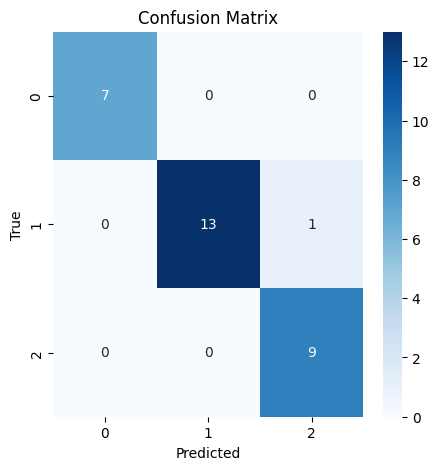

In [19]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A continuación, repetiremos el proceso para clasificar el mismo dataset, esta vez con un modelo de mayor complejidad, con 3 capas ocultas y una de salida, con el objetivo de probar la capacidad de generalización del backpropagation.

In [20]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 20, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(10, 6, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(6, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.softmax_derivate))

In [21]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=300, learning_rate=0.01)

accuracy before training:  0.3
epoch   0 - Loss 3.11962, Accuracy 0.29167
epoch  10 - Loss 0.74259, Accuracy 0.70833
epoch  20 - Loss 0.29119, Accuracy 0.70833
epoch  30 - Loss 0.17810, Accuracy 0.70833
epoch  40 - Loss 0.15431, Accuracy 0.91667
epoch  50 - Loss 0.13029, Accuracy 0.95833
epoch  60 - Loss 0.11477, Accuracy 0.95833
epoch  70 - Loss 0.09560, Accuracy 1.00000
epoch  80 - Loss 0.07750, Accuracy 1.00000
epoch  90 - Loss 0.06466, Accuracy 0.95833
epoch 100 - Loss 0.05524, Accuracy 0.95833
epoch 110 - Loss 0.04804, Accuracy 0.95833
epoch 120 - Loss 0.04244, Accuracy 0.95833
epoch 130 - Loss 0.03800, Accuracy 0.95833
epoch 140 - Loss 0.03442, Accuracy 0.95833
epoch 150 - Loss 0.03148, Accuracy 0.95833
epoch 160 - Loss 0.02905, Accuracy 0.95833
epoch 170 - Loss 0.02699, Accuracy 0.95833
epoch 180 - Loss 0.02524, Accuracy 0.95833
epoch 190 - Loss 0.02372, Accuracy 0.95833
epoch 200 - Loss 0.02239, Accuracy 0.95833
epoch 210 - Loss 0.02120, Accuracy 0.95833
epoch 220 - Loss 0.0201

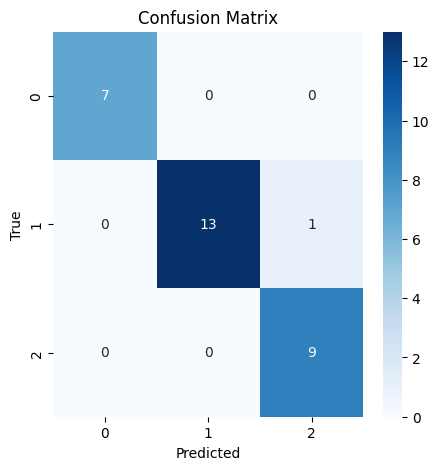

In [22]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

Definimos ahora una red neuronal de 748 entradas, correspondiente con el tamaño de las imágenes del dataset MNIST una vez aplicado un flatten sobre ellas. La red dispondrá de una capa oculta de 10 neuronas, y una capa de salida de también 10 neuronas. La función de activación para la capa oculta será la ReLU, aunque para el paper se utilizó la función sigmoide, y para la de salida la función softmax.

In [23]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 10, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(10, 10, activation=activation_functions.softmax, 
                                activation_derivate=activation_functions.softmax_derivate))

### Dataset de MNIST

Cargamos el dataset haciendo uso de la libería Keras, y dividimos el conjunto de datos en en train y test.

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [25]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = enc.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = enc.fit_transform(y_test.reshape(-1,1)).toarray()

print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))

accuracy before training:  0.083


### Entrenamiento de la red

In [26]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))
optimizers.Adam(nn, x_train, y_train, measure_functions.accuracy, epochs=80, learning_rate=0.001);

accuracy before training:  0.083
epoch   0 - Loss 1.30690, Accuracy 0.68758


KeyboardInterrupt: 

In [ ]:
Y_pred = [nn.feedfoward(x) for x in x_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9283


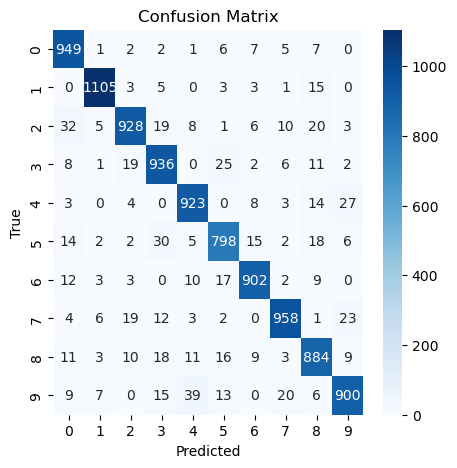

In [ ]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Autoencoder

In [61]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(128, 15, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(15, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(128, 784, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.mse_derivate))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
x_train = x_train[:1000].reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

In [63]:
optimizers.gradient_descent_autoenc(nn, x_train, x_train, epochs=200, learning_rate=0.01);

epoch   0 - Loss 0.23558
epoch  10 - Loss 0.19703
epoch  20 - Loss 0.19059
epoch  30 - Loss 0.19047
epoch  40 - Loss 0.19648
epoch  50 - Loss 0.19550
epoch  60 - Loss 0.19954
epoch  70 - Loss 0.20010
epoch  80 - Loss 0.19683
epoch  90 - Loss 0.20161


KeyboardInterrupt: 

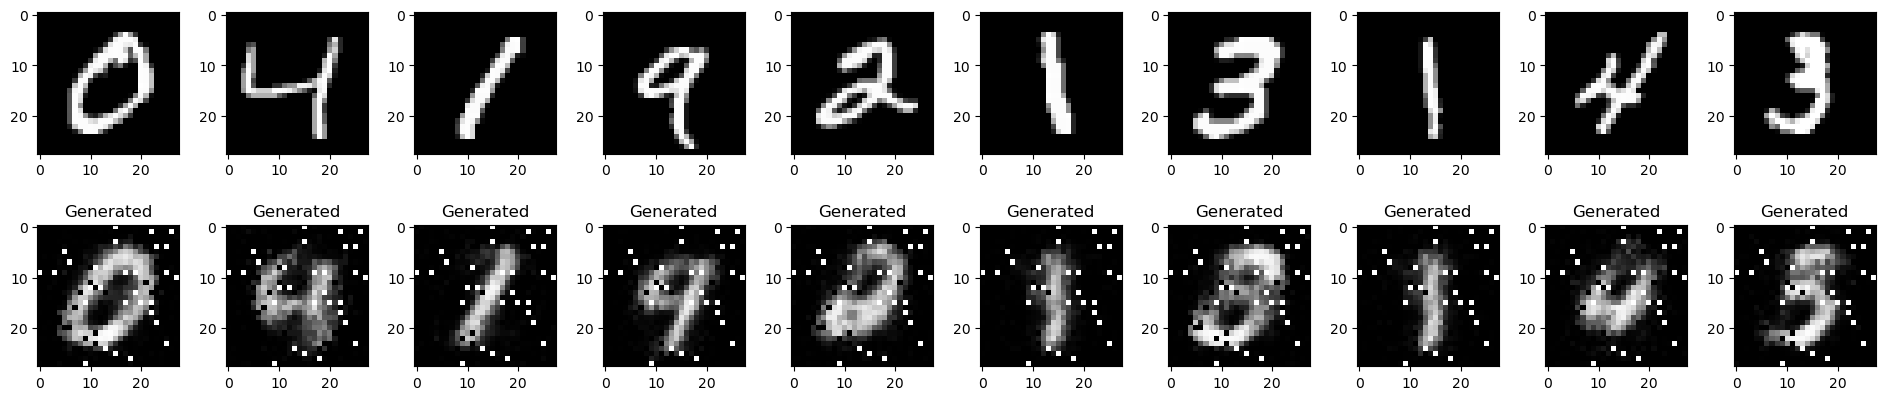

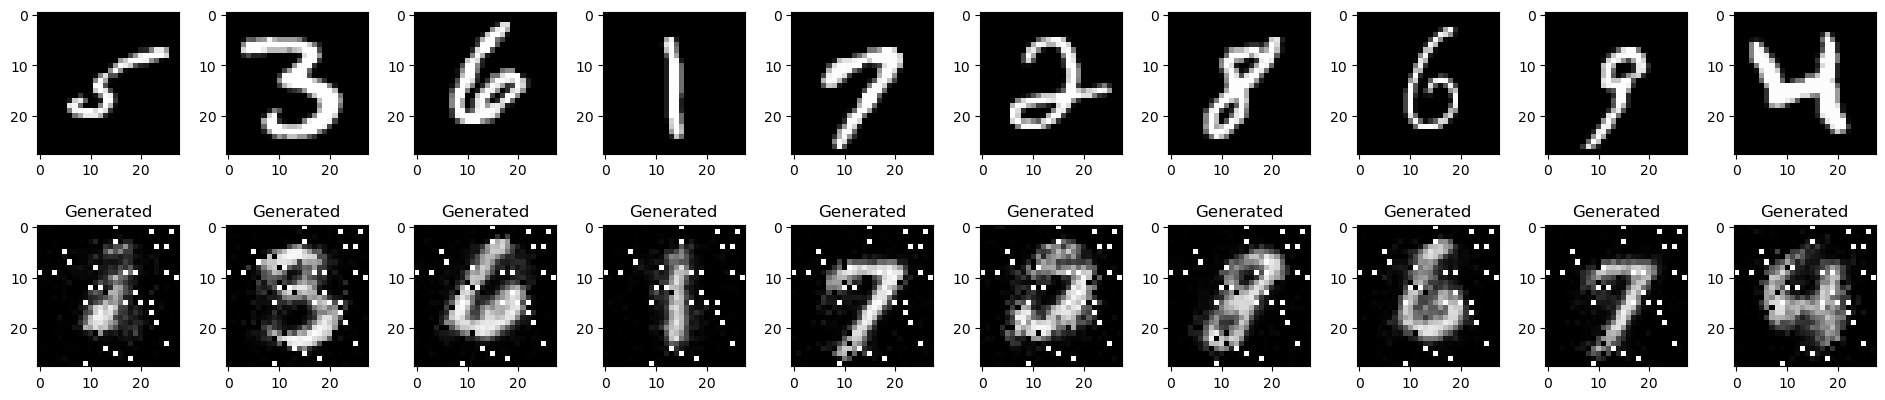

In [64]:
def print_images(init_pos, n):
    plt.figure(figsize=(19, 4))
    plt.gray()

    output = [nn.feedfoward(x_train[i]).reshape(28, 28) for i in range(init_pos, init_pos + n)]
    
    for i, item in enumerate(x_train[init_pos:init_pos + n]):
        plt.subplot(2, n, i + 1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(output):
        plt.subplot(2, n, n + i + 1)
        plt.title(f'Generated')
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()

print_images(1, 10)
print_images(11, 10)
